In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Studying the dataset

In [2]:
fandango=pd.read_csv('fandango_scrape.csv')


In [3]:
fandango.head(10)
#votes - basically popularity of the film
#Rating - actual mean value of the film (values parsed from the site)
#Stars - displayed to the user rating

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337
6,Kingsman: The Secret Service (2015),4.5,4.2,15205
7,Minions (2015),4.0,4.0,14998
8,Avengers: Age of Ultron (2015),5.0,4.5,14846
9,Into the Woods (2014),3.5,3.4,13055


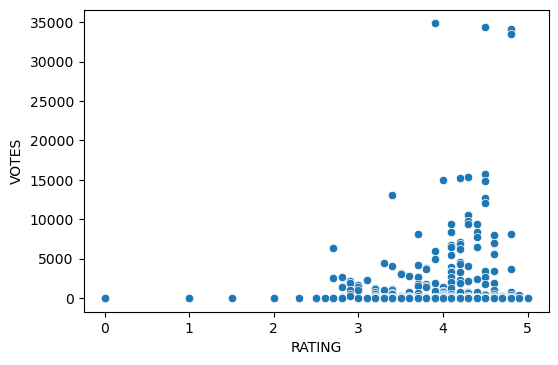

In [45]:
plt.figure(dpi=100)
plot = sns.scatterplot(data=fandango, x=fandango['RATING'], y=fandango['VOTES'])


In [5]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [6]:
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [7]:
def select_year(film_title):
    return int(film_title[-5:-1])

fandango['YEAR'] = np.vectorize(select_year)(fandango['FILM'])
fandango.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


In [8]:
fandango['YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

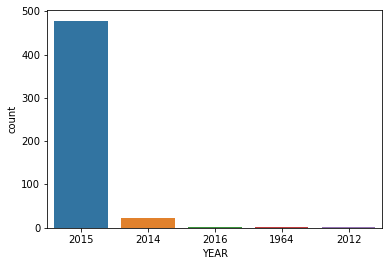

In [9]:
sns.countplot(data=fandango, x='YEAR', order=[2015, 2014, 2016,1964, 2012]);

In [11]:
fandango['VOTES'].value_counts() #many films with less than 5 votes

0       69
1       35
4       22
2       19
5       15
        ..
1501     1
1462     1
1430     1
1415     1
450      1
Name: VOTES, Length: 210, dtype: int64

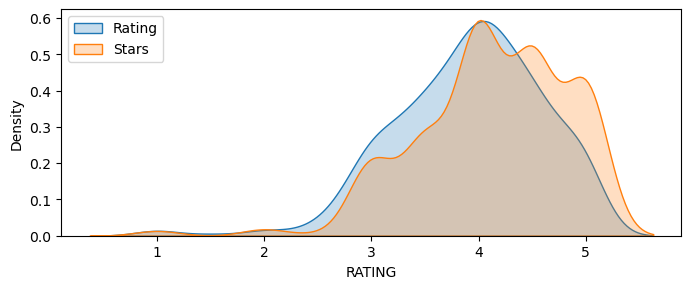

In [13]:
plt.figure(figsize=(8,3), dpi=100)
sns.kdeplot(data=fandango_reviewed, x='RATING', shade=True, label='Rating')
sns.kdeplot(data=fandango_reviewed, x='STARS', shade=True, label='Stars')
plt.legend(loc=2);

In [14]:
def difference(stars, rating):
    if stars > rating:
        return round(stars-rating, 2)
    else:
        return round(rating-stars, 2)
    
    
fandango_reviewed['DIFF_STARS_RATING'] = np.vectorize(difference)(fandango_reviewed['STARS'], fandango_reviewed['RATING'])
fandango_reviewed['DIFF_STARS_RATING'].value_counts()

C:\Users\Danila\AppData\Local\Temp/ipykernel_28504/3338571490.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fandango_reviewed['DIFF_STARS_RATING'] = np.vectorize(difference)(fandango_reviewed['STARS'], fandango_reviewed['RATING'])


0.0    107
0.2     82
0.3     72
0.4     70
0.1     66
0.5     37
1.0      1
Name: DIFF_STARS_RATING, dtype: int64

In [15]:
fandango.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


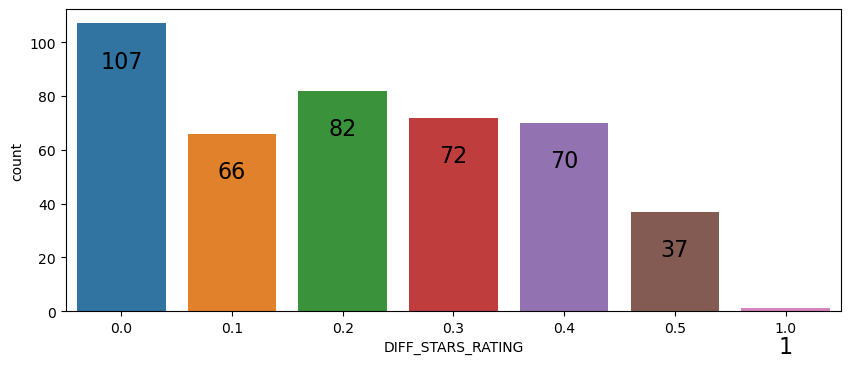

In [16]:
plt.figure(figsize=(10,4), dpi=100) #difference between stars and rating
ax = sns.countplot(data=fandango_reviewed, x='DIFF_STARS_RATING');
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='black', size=16)

In [17]:
all_sites = pd.read_csv("all_sites_scores.csv")

In [18]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [19]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


### Rotten Tomatoes


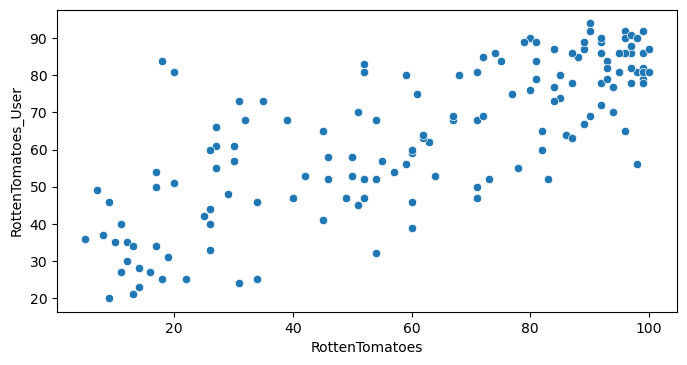

In [20]:
plt.figure(figsize=(8,4),dpi=100)
sns.scatterplot(data=all_sites, x='RottenTomatoes', y='RottenTomatoes_User');

In [21]:
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes']-all_sites['RottenTomatoes_User']
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


Text(0.5, 1.0, 'RT Critics vs. Users')

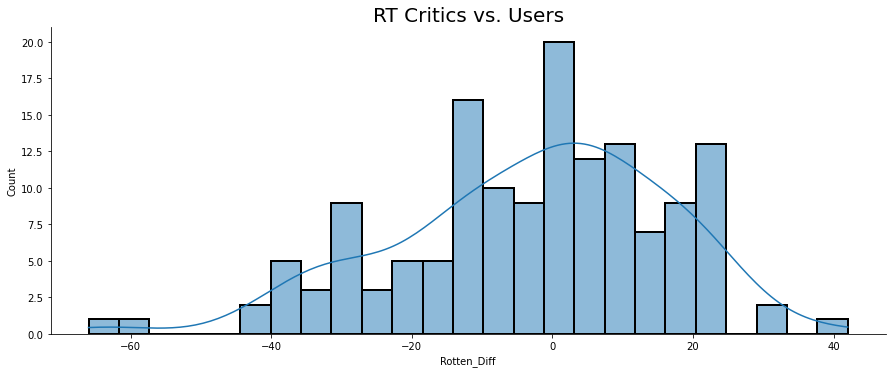

In [23]:
sns.displot(data=all_sites, x='Rotten_Diff', bins=25, kde=True, aspect=2.5, height=5, lw=2);
plt.title('RT Critics vs. Users', fontsize=20)

Text(0.5, 1.0, 'RT Critics vs. Users')

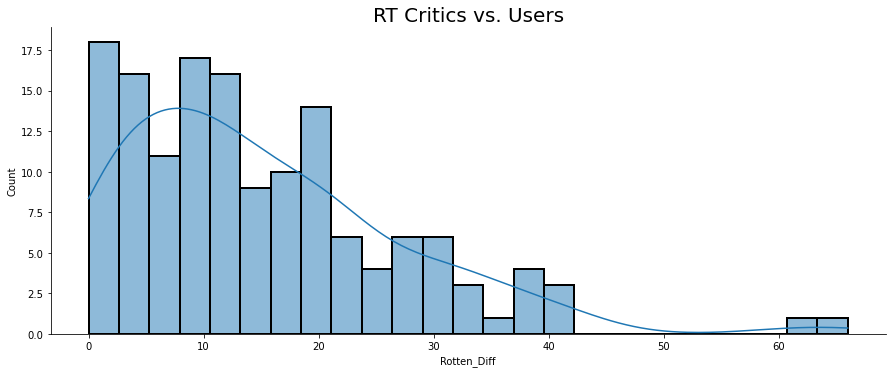

In [24]:
sns.displot(data=abs(all_sites['Rotten_Diff']), bins=25, kde=True, aspect=2.5, height=5, lw=2);
plt.title('RT Critics vs. Users', fontsize=20)

### MetaCritic

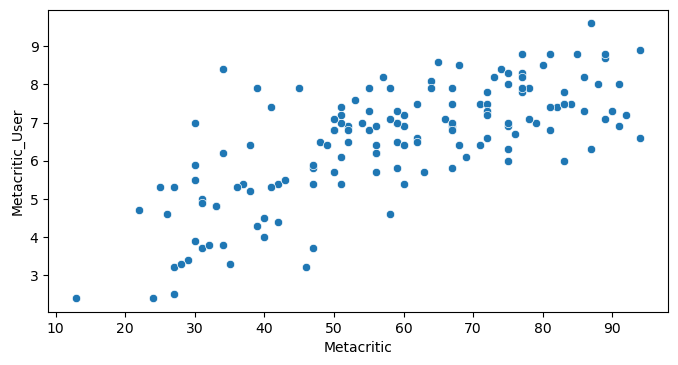

In [25]:
plt.figure(figsize=(8,4),dpi=100)
sns.scatterplot(data=all_sites, x='Metacritic', y='Metacritic_User');

### IMDB



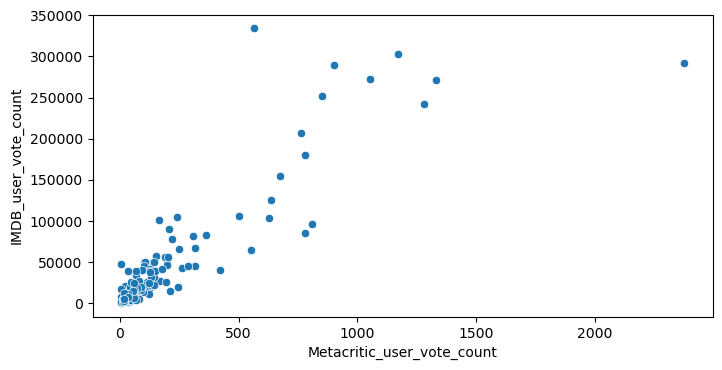

In [26]:
plt.figure(figsize=(8,4),dpi=100)
sns.scatterplot(data=all_sites, x='Metacritic_user_vote_count', y='IMDB_user_vote_count');

### Fandago vs. All Sites



In [27]:
total_table = pd.merge(left=fandango_reviewed, right=all_sites, how='inner')
total_table = total_table.drop('DIFF_STARS_RATING', axis=1)
total_table.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


In [28]:
total_table['RT_Norm'] = np.round(total_table['RottenTomatoes']/20,1)
total_table['RTU_Norm'] = np.round(total_table['RottenTomatoes_User']/20,1)
total_table['Meta_Norm'] = np.round(total_table['Metacritic']/20,1)
total_table['Meta_U_Norm'] = np.round(total_table['Metacritic_User']/2,1)
total_table['IMDB_Norm'] = np.round(total_table['IMDB']/2,1)
total_table.head()
        

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


In [29]:
norm_scores = total_table[['STARS','RATING','RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm', 'IMDB_Norm']]
norm_scores.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


### Final comparison of all sites

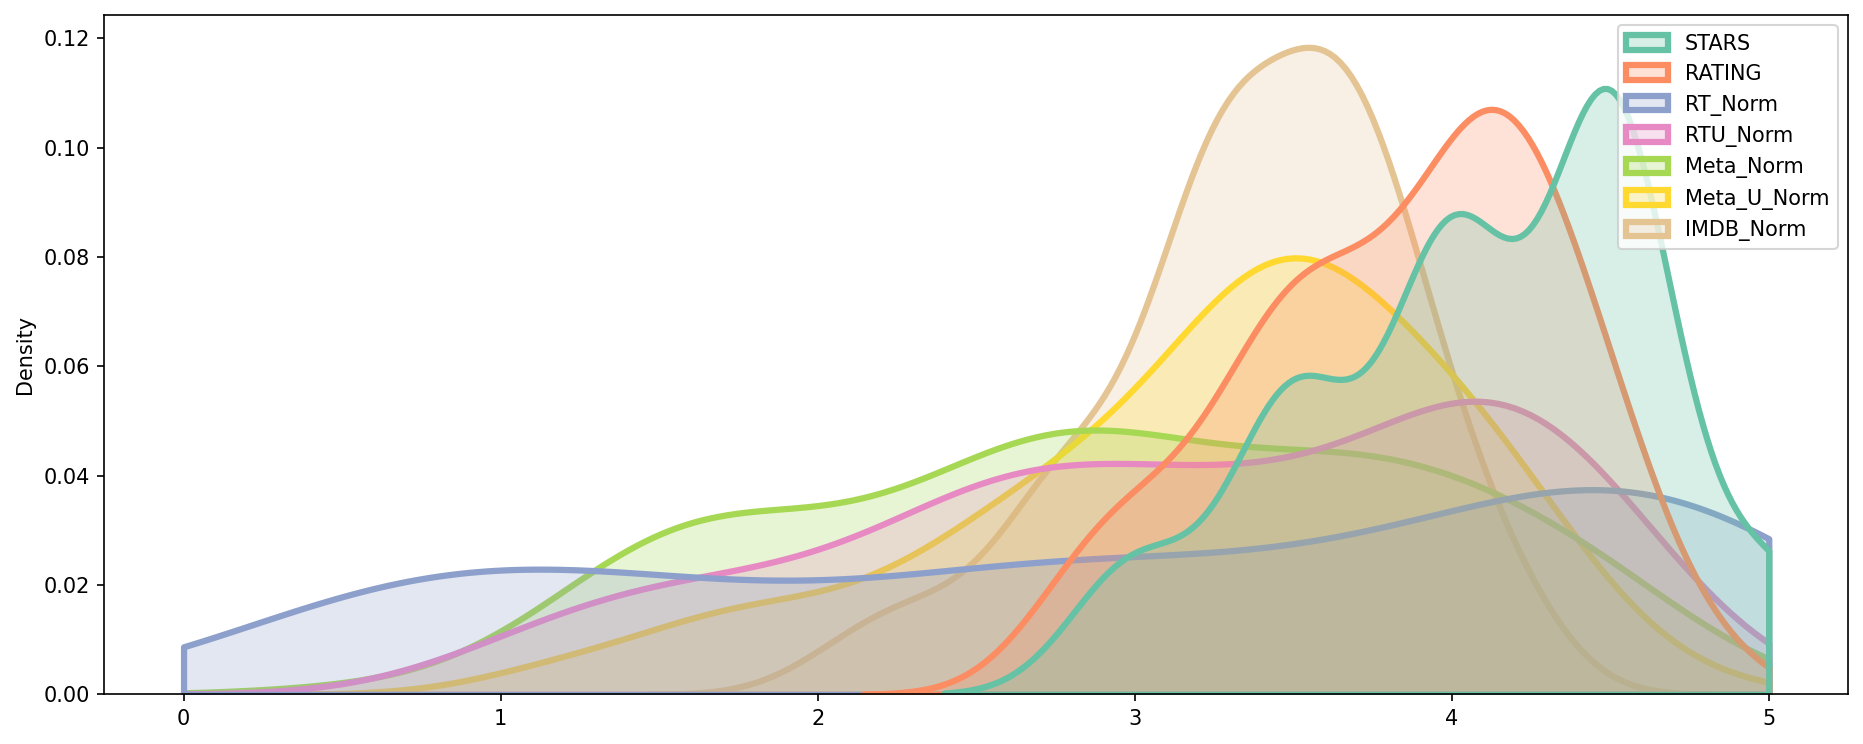

In [41]:
fig, ax = plt.subplots(figsize=(15,6),dpi=150)
sns.kdeplot(data=norm_scores,clip=[0,5],shade=True,palette='Set2',ax=ax, lw=3);

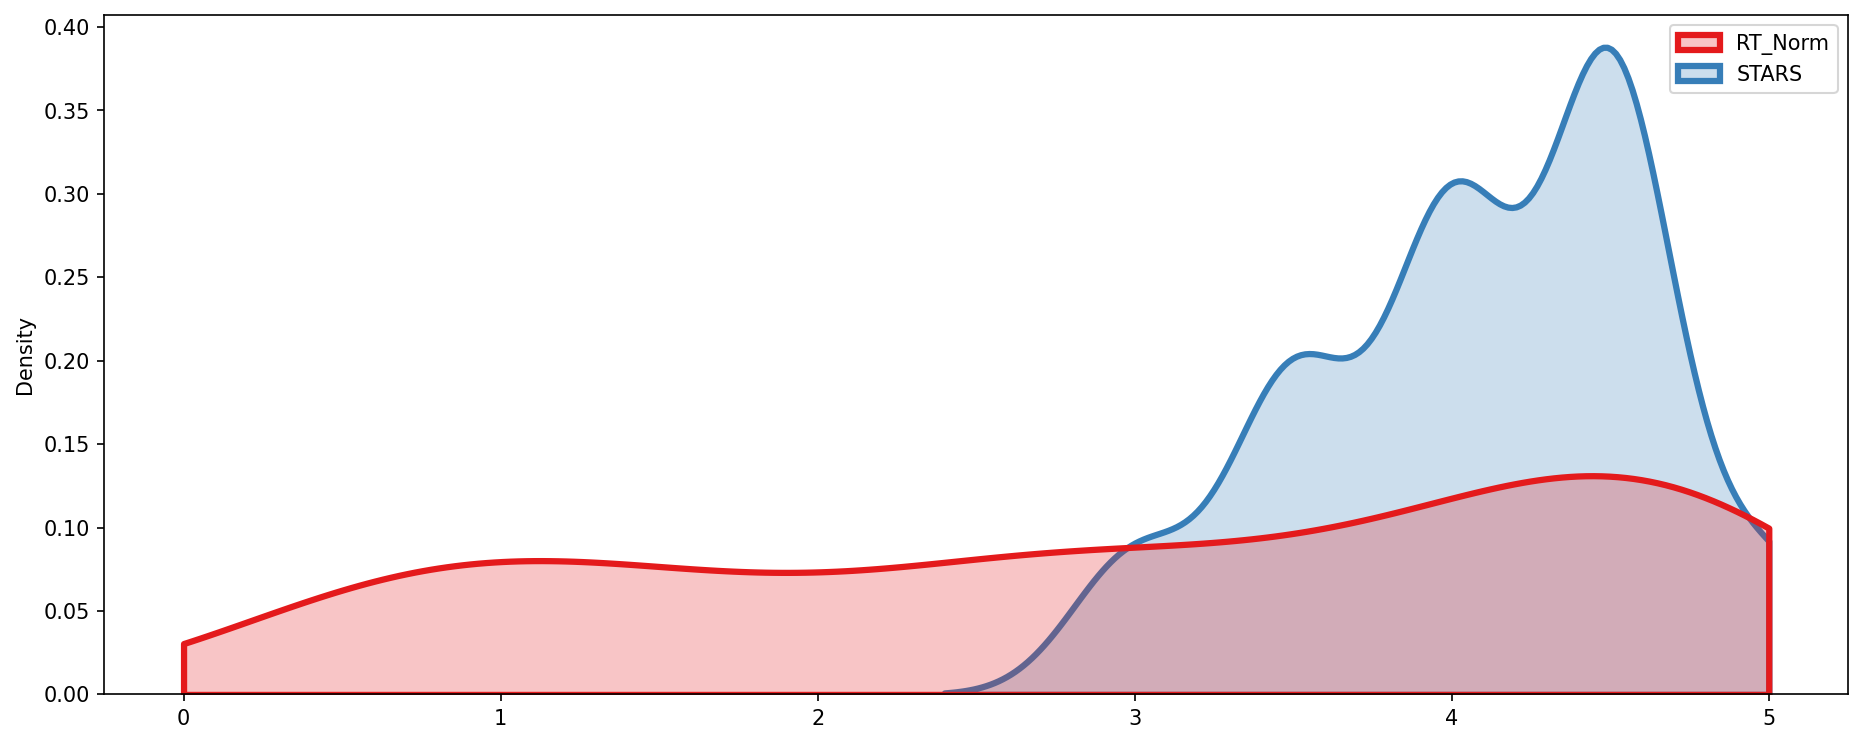

In [42]:
fig, ax = plt.subplots(figsize=(15,6),dpi=150)
sns.kdeplot(data=norm_scores[['RT_Norm','STARS']],clip=[0,5],shade=True,palette='Set1',ax=ax,lw=3);
#Difference between Rotten Tomatoes and Fandango can be clearly seen here. Fandango basically does not have grades below 2.

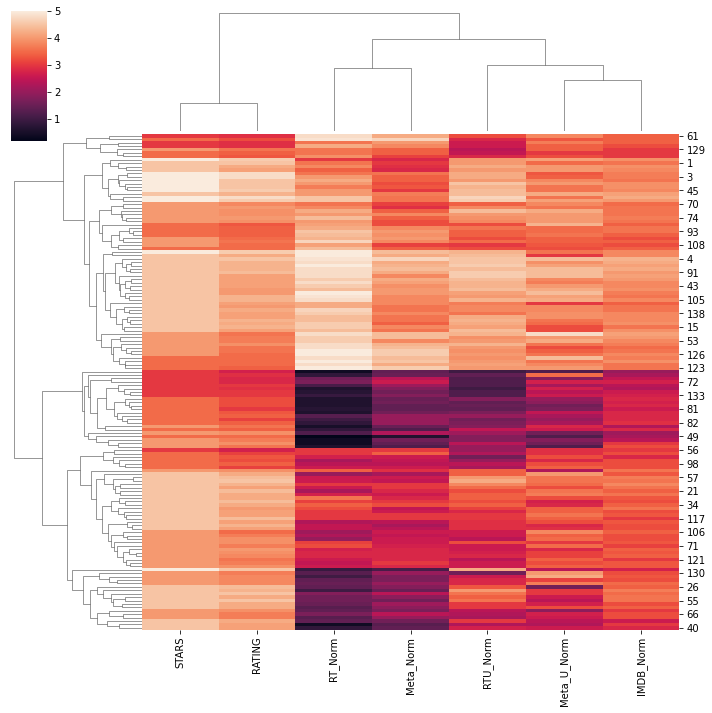

In [48]:
norm_scores = total_table[['STARS', 'RATING', 'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm', 'IMDB_Norm']]

sns.clustermap(data=norm_scores)
#Firtly, overall grades by Fandango are lighter than grades by other, not having even one dark color, demonstrating higher average score on this website
#Secondly, it can be seen that grades from Fandango were grouped separately from other aggregators, hughlighting the difference

----